<a href="https://colab.research.google.com/github/tuyen23122002/demo-github/blob/master/linear%20regresson(vectolization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id 1yXzDN5MK6qAGaVh_Nu5gwG2d1HyDunzd

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1yXzDN5MK6qAGaVh_Nu5gwG2d1HyDunzd
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 24.7MB/s]


In [ ]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
x = data[:,:3]
y = data[:,3:]
ones = np.ones((N,1))
x_data = np.hstack((x,ones))



###SGD

In [ ]:
def train_1(x_data,y,e_poch =50, learning_rate = 0.0001):
  theta = np.random.rand(4,1)
  loss =[]
  N = data.shape[0]


  for j in range (e_poch):

    for i in range (N):
        x = x_data[i]
        y_train = y[i]
        x = np.reshape(x,(4,1))

        #tao ham y_ouput

        yo = np.dot(x.T,theta)

        # ham loss

        L = (yo -  y_train)*(yo -  y_train)


        # gradient descent

        L_theta = 2* x.dot(yo - y_train)

        # update

        theta = theta - learning_rate * L_theta


        loss.append(L[0][0])

  return loss




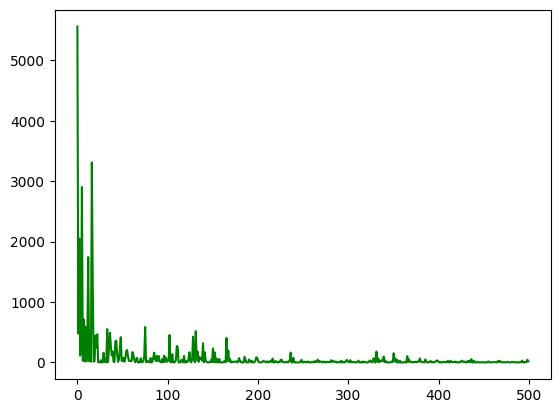

In [ ]:
losses = train_1(x_data, y,e_poch =50, learning_rate=0.00001)

# in loss cho 500 sample đầu
x_axis = list(range(500))
plt.plot(x_axis,losses[:500], color="green")

plt.show()

### Mini Batch gradient descent

In [ ]:
def train_2(x_data,y,e_poch =50, learning_rate = 0.0001,mini_batch =20 ):
  theta = np.random.randn(4,1)
  loss =[]
  N = data.shape[0]
  for i in range (e_poch):
    for j in range (0,N,mini_batch):
      x = x_data[j:j+mini_batch]
      y_data = y[j:j+mini_batch]

      # ham model

      y_mu = np.dot(x,theta)
      # ham loss
      L = (y_mu - y_data)**2

      # tinh dao ham

      gradient = 2*np.dot(x.T,(y_mu - y_data))/mini_batch

      # cap nhat tham si
      theta = theta - learning_rate*gradient

      loss_mean = np.sum(L)/mini_batch
      loss.append(loss_mean)

  return loss



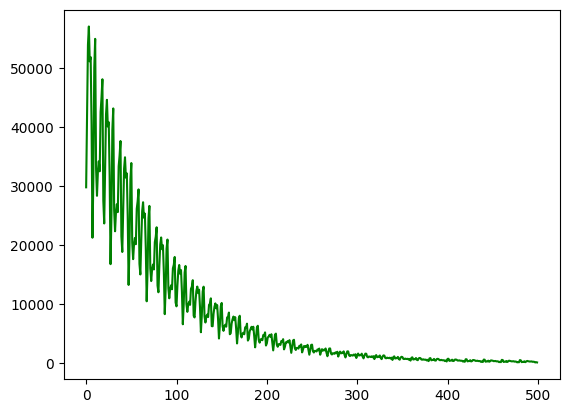

In [ ]:
losses = train_2(x_data,y,e_poch =50, learning_rate = 0.0000001 ,mini_batch =10 )

# in loss cho 500 sample đầu
x_axis = list(range(500))
plt.plot(x_axis,losses[:500], color="green")

plt.show()

###Batch


In [ ]:
def train_3(x_data,y,e_poch = 50,learning_rate = 0.00001):
  theta = np.random.randn(4,1)
  loss =[]
  N = data.shape[0]
  for i in range (e_poch):
    x = x_data[0:N]
    y_data = y[0:N]

    # ham model
    y_mu = np.dot(x,theta)

    # ham loss
    L = (y_mu - y_data)**2

    # gradient

    gradient = 2*np.dot(x.T,y_mu-y_data)/N
    # update

    theta = theta - learning_rate * gradient

    mean_loss = np.sum(L)/N

    loss.append(mean_loss)

  return loss

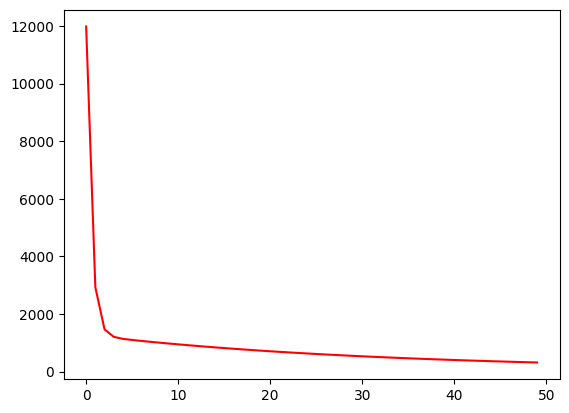

In [ ]:
losses = train_3(x_data, y=y,e_poch=100, learning_rate=0.00001)

# in loss cho 100 sample đầu
x_axis = list(range(50))
plt.plot(x_axis,losses[:50], color="r")
plt.show()